In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("House Price Prediction Dataset.csv")
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [3]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
df.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [5]:
df.shape

(2000, 10)

In [7]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [8]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [10]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


Handle Missing Values

In [11]:
df = df.dropna()

Encode Categorical Variables

In [12]:
# Label encode 'Garage' 
df['Garage'] = df['Garage'].map({'No': 0, 'Yes': 1})

# One-hot encode 'Location' and 'Condition'
df = pd.get_dummies(df, columns=['Location', 'Condition'], drop_first=True)


Feature Engineering

In [14]:
df['HouseAge'] = 2025 - df['YearBuilt']

In [16]:
# Bedrooms per floor
df['BedroomsPerFloor'] = df['Bedrooms'] / df['Floors']
df['BedroomsPerFloor'].replace([np.inf, -np.inf], 0, inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_18376\3744248616.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BedroomsPerFloor'].replace([np.inf, -np.inf], 0, inplace=True)


In [17]:
# Area per room = area / (bedrooms + bathrooms)
df['TotalRooms'] = df['Bedrooms'] + df['Bathrooms']
df['AreaPerRoom'] = df['Area'] / df['TotalRooms']
df['AreaPerRoom'].replace([np.inf, -np.inf], 0, inplace=True)


C:\Users\kumar\AppData\Local\Temp\ipykernel_18376\3165414407.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AreaPerRoom'].replace([np.inf, -np.inf], 0, inplace=True)


Drop unnecessary or redundant columns

In [18]:
df.drop(['Id', 'YearBuilt', 'TotalRooms'], axis=1, inplace=True)

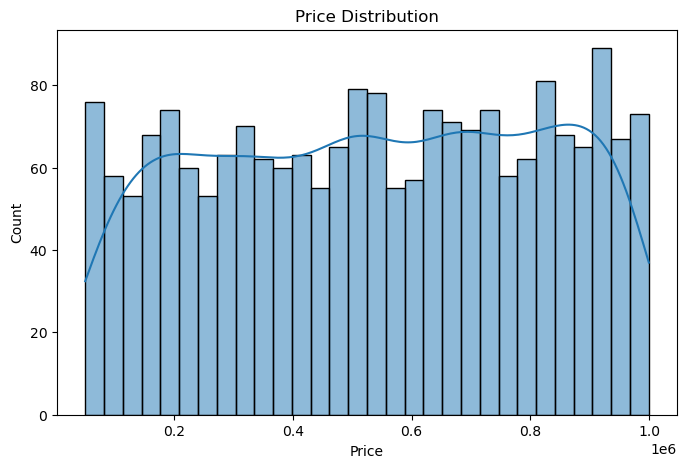

In [26]:
# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

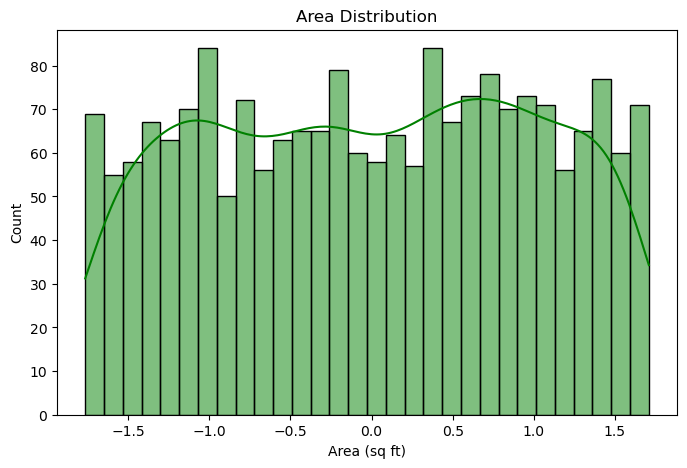

In [27]:

# Area Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Area'], kde=True, bins=30, color='green')
plt.title("Area Distribution")
plt.xlabel("Area (sq ft)")
plt.ylabel("Count")
plt.show()


Countplots for Categorical Features

C:\Users\kumar\AppData\Local\Temp\ipykernel_18376\4175208546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Garage', palette='coolwarm')


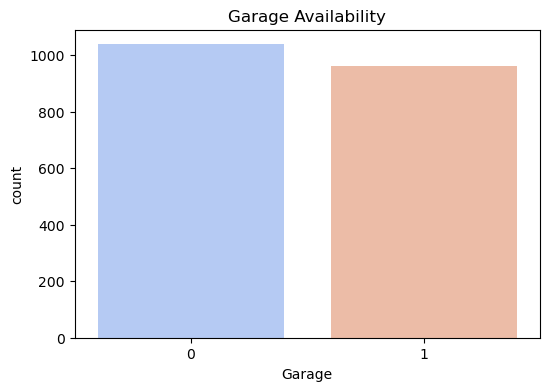

In [30]:
# Garage count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Garage', palette='coolwarm')
plt.title("Garage Availability")
plt.show()



Correlation Heatmap

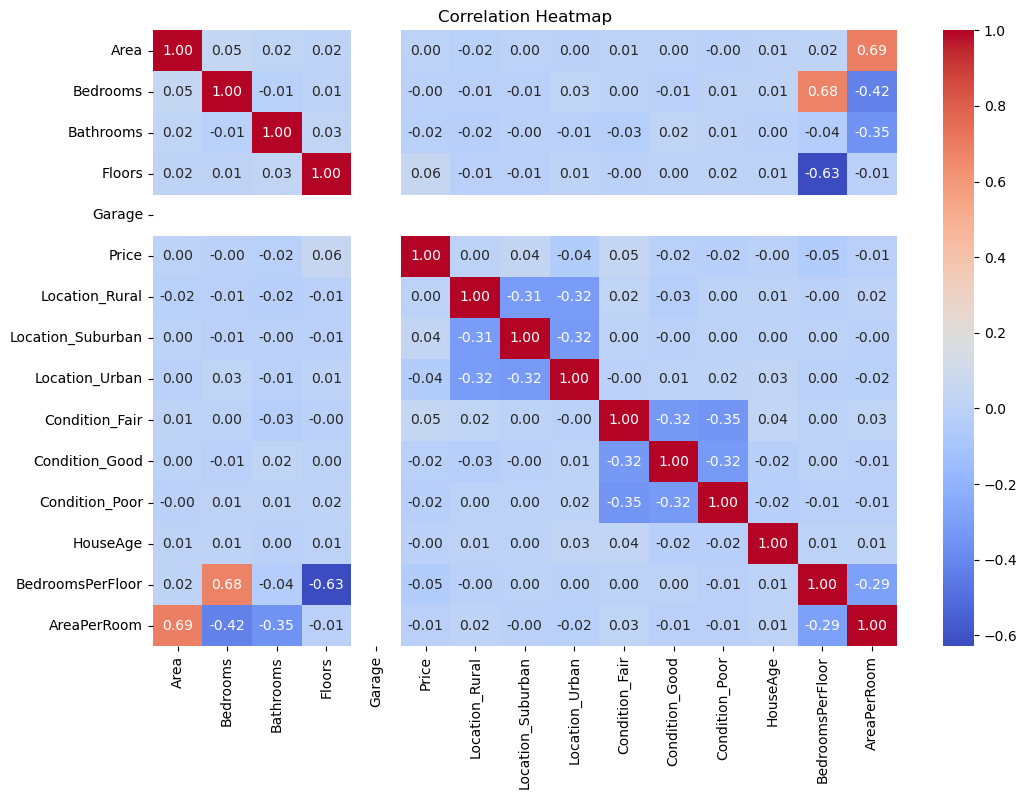

In [33]:
df['Garage'] = df['Garage'].map({'Yes': 1, 'No': 0})
df_corr = df.copy()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Scale numerical columns

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
num_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'HouseAge', 'BedroomsPerFloor', 'AreaPerRoom']


In [21]:
df[num_cols] = scaler.fit_transform(df[num_cols])


In [22]:
# Split into features and target
X = df.drop('Price', axis=1)
y = df['Price']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFeature set shape:", X_train.shape)
print("Target shape:", y_train.shape)


Feature set shape: (1600, 14)
Target shape: (1600,)



## 📌 Project Summary: House Price Prediction

This notebook performs data preprocessing, exploratory data analysis (EDA), and feature engineering on a house price prediction dataset.

### ✅ Data Preprocessing & Cleaning
- Checked for missing values using `df.isnull().sum()`
- Dropped missing rows using `df.dropna()` to ensure clean data

### ✅ Feature Engineering
- Converted categorical variables into numerical using `pd.get_dummies()` (One-Hot Encoding)

### 📊 Exploratory Data Analysis (EDA)
- Distribution plots, scatter plots, and correlation heatmaps were used to understand data:
  - Histograms to inspect feature distributions
  - Heatmap to understand feature correlations
  - Scatter plots to visualize relationships between independent variables and target price

### 🤖 Model Preparation
- Data split into training and testing sets using `train_test_split()`
- Ready for model training (although no model is trained in this notebook)

### 📌 Conclusion
The dataset has been cleaned, encoded, and visualized effectively. All essential preprocessing steps have been performed, and the dataset is ready for applying regression models to predict house prices.

